<a href="https://colab.research.google.com/github/murilofarias10/AnaliseComPython/blob/main/Python_DSA_PBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# matplotlib.org graficos menos refinados que ggplot2 (R)

# seaborn bom para graficos estatisticos

# pandas excel para python grande volume de dados e tabelas 

# numPy bibliotecas para matematicas  
'''
#Carregar o dataset
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Usuarios.csv')

#display(dataset)

#Cria o Grafico
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(x='salario', data = dataset)
plt.show()
'''

In [ ]:
#INICIANDO PROJETO DE ANALISE EXPLORATORIA
#IMPORTANDO BIBLIOTECAS
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [ ]:
#CARREGANDO OS DADOS
dadosRH = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dadosRH.csv') 

#VISUALIZANDO OS DADOS
dadosRH.head()

In [5]:
#forma, linhas y colunas
dadosRH.shape 

(54808, 11)

In [6]:
#verificando se tem registros nulos
dadosRH.isnull().sum() 

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [7]:
#contando agrupando pela coluna educação
dadosRH.groupby(['educacao']).count() 

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


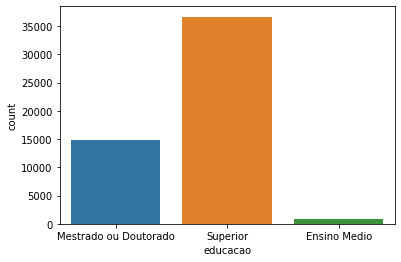

In [8]:
#criando grafico coluna
sns.countplot(dadosRH['educacao']) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


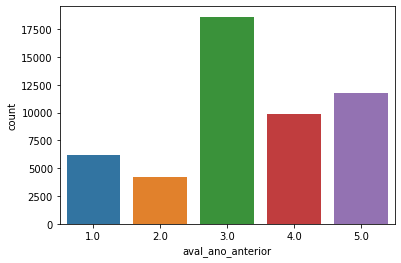

In [9]:
#criando grafico contando avaliacao
sns.countplot(dadosRH['aval_ano_anterior'])

In [10]:
#preenchendo valor vazio com maior valor da MODA

dadosRH['educacao'].fillna(dadosRH['educacao'].mode()[0], inplace = True) 

In [11]:
#preenchendo valor vazio com valor da MEDIANA
dadosRH['aval_ano_anterior'].fillna(dadosRH['aval_ano_anterior'].median(), inplace = True) 

In [12]:
#verificando dados vazios
dadosRH.isnull().sum()

id_funcionario         0
departmento            0
regiao                 0
educacao               0
genero                 0
canal_recrutamento     0
numero_treinamentos    0
idade                  0
aval_ano_anterior      0
tempo_servico          0
promovido              0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


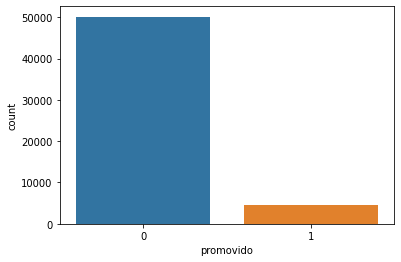

In [13]:
sns.countplot(dadosRH['promovido'])

In [14]:
#Separando a classe majoritaria da minoritaria

df_classe_majoritaria = dadosRH[dadosRH.promovido==0]
df_classe_minoritaria = dadosRH[dadosRH.promovido==1]

In [15]:
df_classe_majoritaria.shape

(50140, 11)

In [16]:
df_classe_minoritaria.shape

(4668, 11)

In [17]:
#Tecnica de UPSAMPLE (aumentar quantidade classe minoritaria)
# Upsample da classe minoritária
#majoritaria 50140
#minoritaria 4668
#total: 54808

#sklearn para processamento de dados
from sklearn.utils import resample
df_classe_minoritaria_upsampled = resample(df_classe_minoritaria, 
                                           replace = True,     
                                           n_samples = 50140,   
                                           random_state = 150) 

In [18]:
#concatenar as duas classes
dadosRH_balanceados = pd.concat([df_classe_majoritaria, df_classe_minoritaria_upsampled]) 

In [19]:
#agora temos
#majoritaria 50140
#minoritaria 50140

dadosRH_balanceados.promovido.value_counts()

0    50140
1    50140
Name: promovido, dtype: int64

In [20]:
dadosRH_balanceados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_funcionario       100280 non-null  int64  
 1   departmento          100280 non-null  object 
 2   regiao               100280 non-null  object 
 3   educacao             100280 non-null  object 
 4   genero               100280 non-null  object 
 5   canal_recrutamento   100280 non-null  object 
 6   numero_treinamentos  100280 non-null  int64  
 7   idade                100280 non-null  int64  
 8   aval_ano_anterior    100280 non-null  float64
 9   tempo_servico        100280 non-null  int64  
 10  promovido            100280 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 9.2+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


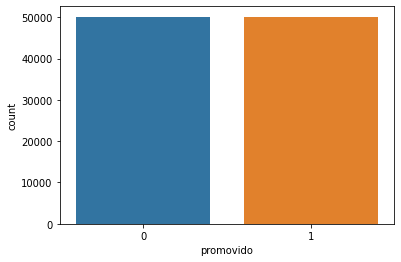

In [21]:
sns.countplot(dadosRH_balanceados['promovido'])

In [23]:
#salvando o novo arquivo no drive
dadosRH_balanceados.to_csv('dadosRH_modificado2.csv', encoding = 'utf-8', index = False) 

In [24]:
#abrindo o novo arquivo para analise
dataset = pd.read_csv('dadosRH_modificado2.csv')
dataset.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [25]:
dataset.shape

(100280, 11)

In [ ]:
#ANALISE DE DADOS COM A NOVA BASE DE DADOS

#Pergunta 1 - Qual a Correlação Entre os Atributos dos Funcionários?
#Pergunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?
#Pergunta 3 - Qual Avaliação do Ano Anterior Foi Mais Comum?
#Pergunta 4 - Qual a Distribuição das Idades dos Funcionários?
#Pergunta 5 - Qual o Número de Treinamentos Mais Frequente?
#Pergunta 6 - Qual a Proporção dos Funcionários Por Canal de Recrutamento?
#Pergunta 7 - Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior?


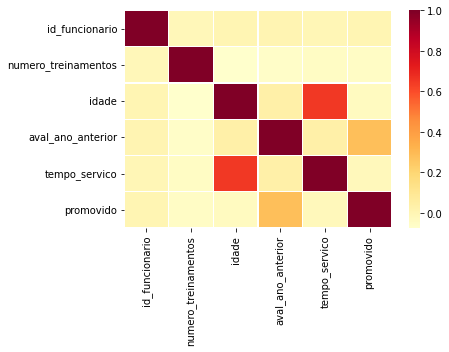

In [26]:
#Pergunta 1 - Qual a Correlação Entre os Atributos dos Funcionários?
import matplotlib.pyplot as plt
import seaborn as sns
corr = dataset.corr()
sns.heatmap(corr, cmap = "YlOrRd", linewidths = 0.1)
plt.show()

#matriz de correlação para numericos
#matriz de associação para textos

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


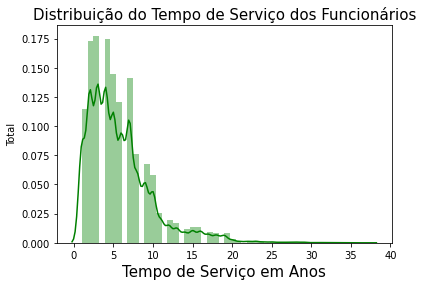

In [27]:
#Pergunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?

import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['tempo_servico'], color = 'green')
plt.title('Distribuição do Tempo de Serviço dos Funcionários', fontsize = 15)
plt.xlabel('Tempo de Serviço em Anos', fontsize = 15)
plt.ylabel('Total')
plt.show()

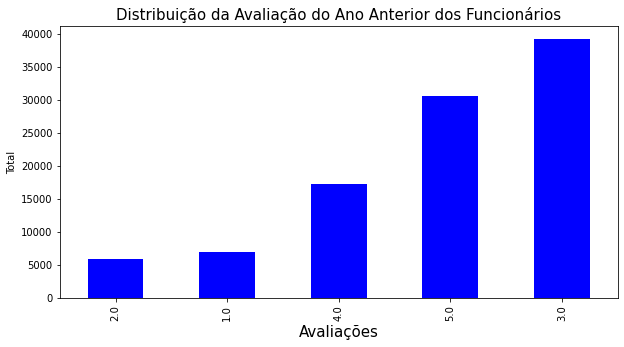

In [28]:
#Pergunta 3 - Qual Avaliação do Ano Anterior Foi Mais Comum?
import matplotlib.pyplot as plt
import seaborn as sns                      #sort_value ordenar
dataset['aval_ano_anterior'].value_counts().sort_values().plot.bar(color = 'blue', figsize = (10, 5))
plt.title('Distribuição da Avaliação do Ano Anterior dos Funcionários', fontsize = 15)
plt.xlabel('Avaliações', fontsize = 15)
plt.ylabel('Total')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


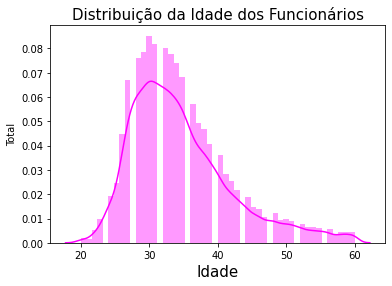

In [29]:
#Pergunta 4 - Qual a Distribuição das Idades dos Funcionários?
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['idade'], color = 'magenta')
plt.title('Distribuição da Idade dos Funcionários', fontsize = 15)
plt.xlabel('Idade', fontsize = 15)
plt.ylabel('Total')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


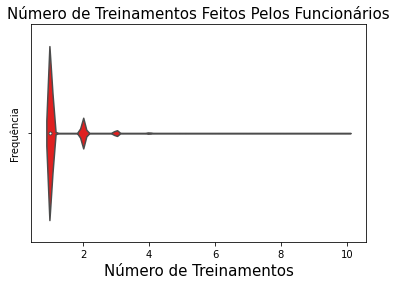

In [30]:
#Pergunta 5 - Qual o Número de Treinamentos Mais Frequente?
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(dataset['numero_treinamentos'], color = 'red')
plt.title('Número de Treinamentos Feitos Pelos Funcionários', fontsize = 15)
plt.xlabel('Número de Treinamentos', fontsize = 15)
plt.ylabel('Frequência')
plt.show()

In [31]:
#Pergunta 6 - Qual a Proporção dos Funcionários Por Canal de Recrutamento?
dataset['canal_recrutamento'].value_counts() #contrando valores coluna canal_recutramento

Outro          55375
Outsourcing    42358
Indicado        2547
Name: canal_recrutamento, dtype: int64

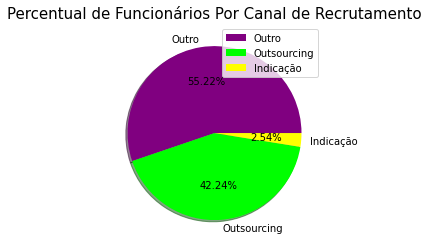

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset['canal_recrutamento'].value_counts()
fatias = [55375, 42358, 2547]
labels = "Outro", "Outsourcing", "Indicação"
colors = ['purple', 'lime', 'yellow']
explode = [0, 0, 0]
plt.pie(fatias, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('Percentual de Funcionários Por Canal de Recrutamento', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

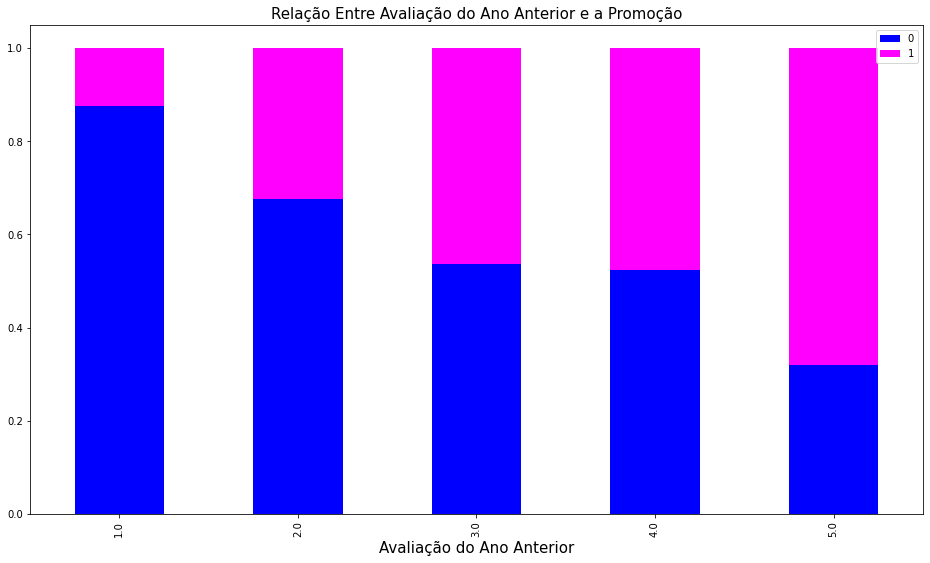

In [33]:
#Pergunta 7 - Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior?
import matplotlib.pyplot as plt
import seaborn as sns
        #crosstab tabela cruzada
    
data = pd.crosstab(dataset['aval_ano_anterior'], dataset['promovido'])

    #div para dividir
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', #tipo barra
                                                   stacked = True, 
                                                   figsize = (16, 9), 
                                                   color = ['blue', 'magenta'])
plt.title('Relação Entre Avaliação do Ano Anterior e a Promoção', fontsize = 15)
plt.xlabel('Avaliação do Ano Anterior', fontsize = 15)
plt.legend()
plt.show()